In [1]:
# Importing packages nedded

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
#Load Data and see basic data properties.

data = pd.read_csv('../data/sierraleone-bumbuna.csv')
print(data.head())
data.shape

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


(525600, 19)

Summary Statistics: Calculate the mean, median, standard deviation, and other statistical measures for each numeric column to understand data distribution.

In [3]:
# Displaying Statistics Summary. As required in Task discription 

data.describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.100000      68.700000       0.000000   
50%         3.400000      25.300000      85.400000       0.800000   
75%       345.400000      29.400000      96.700000       2.000000   
max      1473.000000      39.900000     100.000000      19.200000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        1.691606       0.363823     133.044668       7.172220   
std         1.617053       0.295000     114.284792       7.535093   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.600000       0.400000     161.500000       6.200000   
75%         2.600000       0.600000     234.100000      12.000000   
max        23.900000       4.100000     360.000000      98.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      999.876469       0.000967       0.004806      32.504263   
std         2.104419       0.031074       0.047556      12.434899   
min       993.000000       0.000000       0.000000      10.700000   
25%       999.000000       0.000000       0.000000      23.500000   
50%      1000.000000       0.000000       0.000000      26.600000   
75%      1001.000000       0.000000       0.000000      40.900000   
max      1006.000000       1.000000       2.400000      72.800000   

               TModB  Comments  
count  525600.000000       0.0  
mean       32.593091       NaN  
std        12.009161       NaN  
min        11.100000       NaN  
25%        23.800000       NaN  
50%        26.900000       NaN  
75%        41.300000       NaN  
max        70.400000       NaN

Data Quality Check: Look for missing values, outliers, or incorrect entries (e.g., negative values where only positive should exist), especially in columns like GHI, DNI, and DHI and check for outliers, especially in sensor readings (ModA, ModB) and wind speed data (WS, WSgust).

In [4]:
# Displaying  missing values. 
data.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [5]:
# Displaying outliers using z-score and threshold 2 as it's general convention that z-scores above 2 is outliner.
# Out liners from WS, WSgust, TModA, TModB
# Using scipy.stats form stats

columns_to_check_for_outliners = ['WS', 'WSgust', 'TModA', 'TModB']
z_scores = data[columns_to_check_for_outliners].apply(zscore)

threshold = 2
outliers = (z_scores.abs() > threshold)
data['Outlier'] = outliers.any(axis=1)

outlier_data = data[data['Outlier']]
print(outlier_data, outlier_data.shape)

               Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
661     2021-10-30 11:02   978.0  506.0  541.7  1049.0  1025.0  26.4  82.7   
662     2021-10-30 11:03  1071.0  616.0  539.1  1142.0  1116.0  26.4  82.5   
663     2021-10-30 11:04  1119.0  673.5  538.4  1193.0  1167.0  26.3  83.1   
664     2021-10-30 11:05  1009.0  560.6  524.8  1070.0  1046.0  26.3  82.9   
665     2021-10-30 11:06   970.0  534.1  507.0  1036.0  1012.0  26.4  82.3   
...                  ...     ...    ...    ...     ...     ...   ...   ...   
524867  2022-10-29 11:48   699.5  233.9  481.6   741.1   722.1  30.9  73.8   
524868  2022-10-29 11:49   657.9  196.9  474.5   696.0   677.7  30.9  74.4   
524869  2022-10-29 11:50   667.9  205.4  475.6   702.7   684.1  30.9  74.6   
524870  2022-10-29 11:51   606.9  159.6  456.2   638.4   621.2  30.8  75.2   
524871  2022-10-29 11:52   504.3   67.4  440.1   531.3   517.3  30.8  75.5   

         WS  WSgust  WSstdev     WD  WDstdev    BP  Cleaning  P

In [6]:
# Displaying Incorrect values from GHI, DNI, DHI

columns_to_check_for_incorrect_values = ['GHI', 'DNI', 'DHI']

negative_values = data[(data[columns_to_check_for_incorrect_values] < 0).any(axis=1)]
print(negative_values)

               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  WSgust  \
0       2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.1  0.0     0.0   
1       2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
2       2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
3       2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
4       2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
...                  ...  ...  ...  ...   ...   ...   ...    ...  ...     ...   
525595  2022-10-29 23:56 -1.6 -0.1 -2.9   0.0   0.0  24.0  100.0  0.0     0.0   
525596  2022-10-29 23:57 -1.7 -0.1 -3.0   0.0   0.0  24.0  100.0  0.0     0.0   
525597  2022-10-29 23:58 -1.7 -0.1 -3.1   0.0   0.0  24.0  100.0  0.0     0.0   
525598  2022-10-29 23:59 -1.7 -0.2 -3.3   0.0   0.0  23.9  100.0  0.0     0.0   
525599  2022-10-30 00:00 -1.7 -0.1 -3.4   0.0   0.0  23.9  100.0  0.0     0.0   

        WSstdev   WD  WDstd

Time Series Analysis: Plot line graphs or area plots of GHI, DNI, DHI, and Tamb over time to observe patterns by month, trends throughout day, or anomalies, such as peaks in solar irradiance or temperature fluctuations. 

In [7]:
# Convert 'Timestamp' to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.set_index('Timestamp', inplace=True)

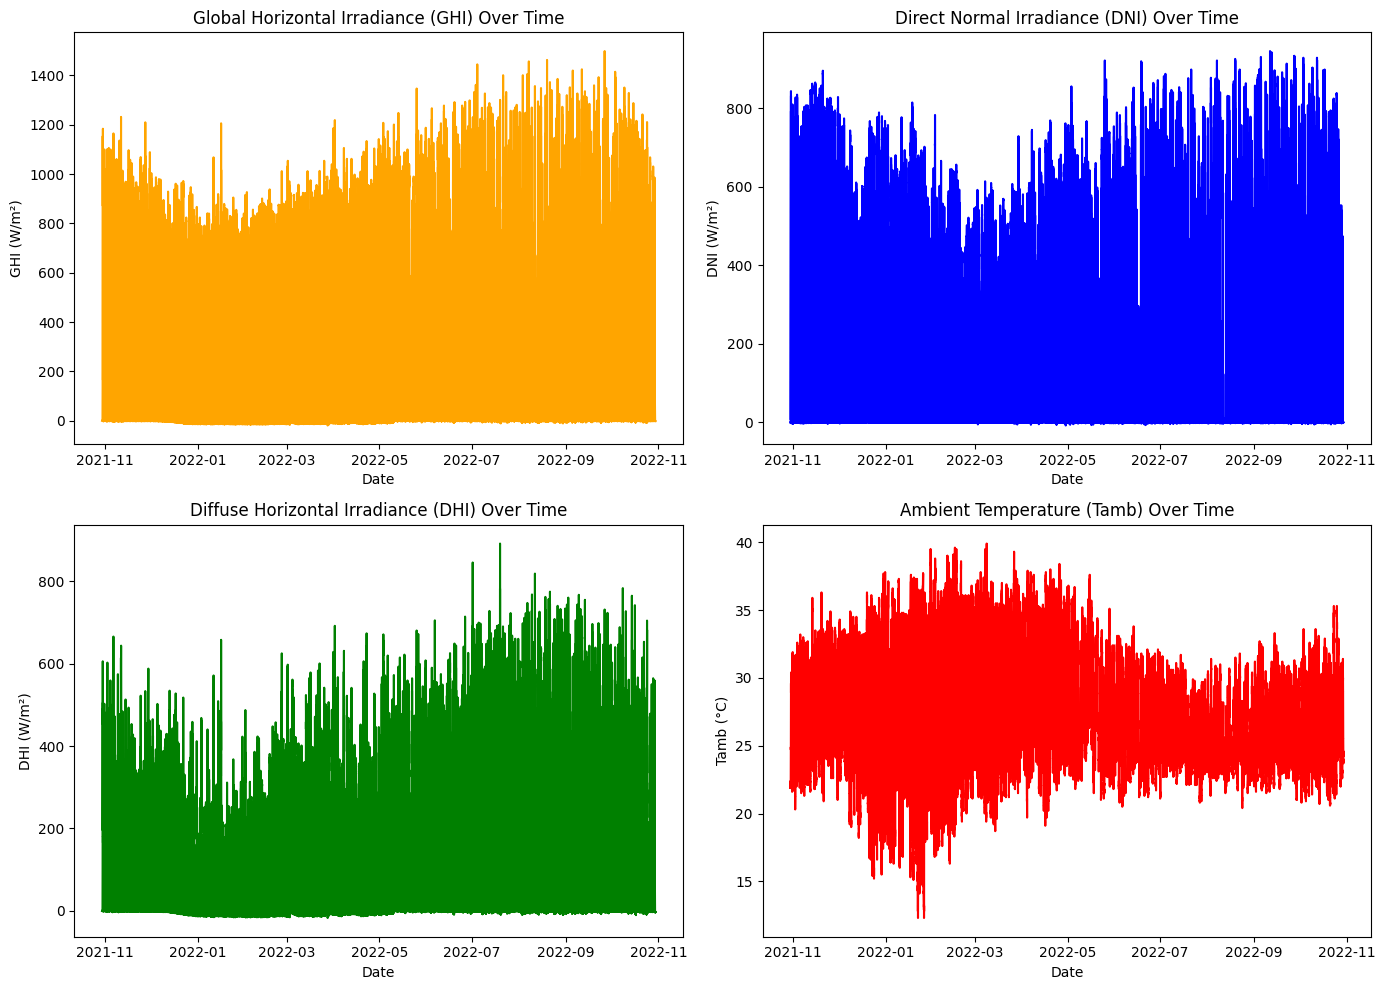

In [8]:
# Daily Plots for GHI, DNI, DHI, and Tamb

daily_data = data.resample('D').mean()
plt.figure(figsize=(14, 10))

# Plot GHI
plt.subplot(2, 2, 1)
plt.plot(data.index, data['GHI'], color='orange')
plt.title('Global Horizontal Irradiance (GHI) Over Time')
plt.xlabel('Date')
plt.ylabel('GHI (W/m²)')

# Plot DNI
plt.subplot(2, 2, 2)
plt.plot(data.index, data['DNI'], color='blue')
plt.title('Direct Normal Irradiance (DNI) Over Time')
plt.xlabel('Date')
plt.ylabel('DNI (W/m²)')

# Plot DHI
plt.subplot(2, 2, 3)
plt.plot(data.index, data['DHI'], color='green')
plt.title('Diffuse Horizontal Irradiance (DHI) Over Time')
plt.xlabel('Date')
plt.ylabel('DHI (W/m²)')

# Plot Tamb
plt.subplot(2, 2, 4)
plt.plot(data.index, data['Tamb'], color='red')
plt.title('Ambient Temperature (Tamb) Over Time')
plt.xlabel('Date')
plt.ylabel('Tamb (°C)')

plt.tight_layout()
plt.show()



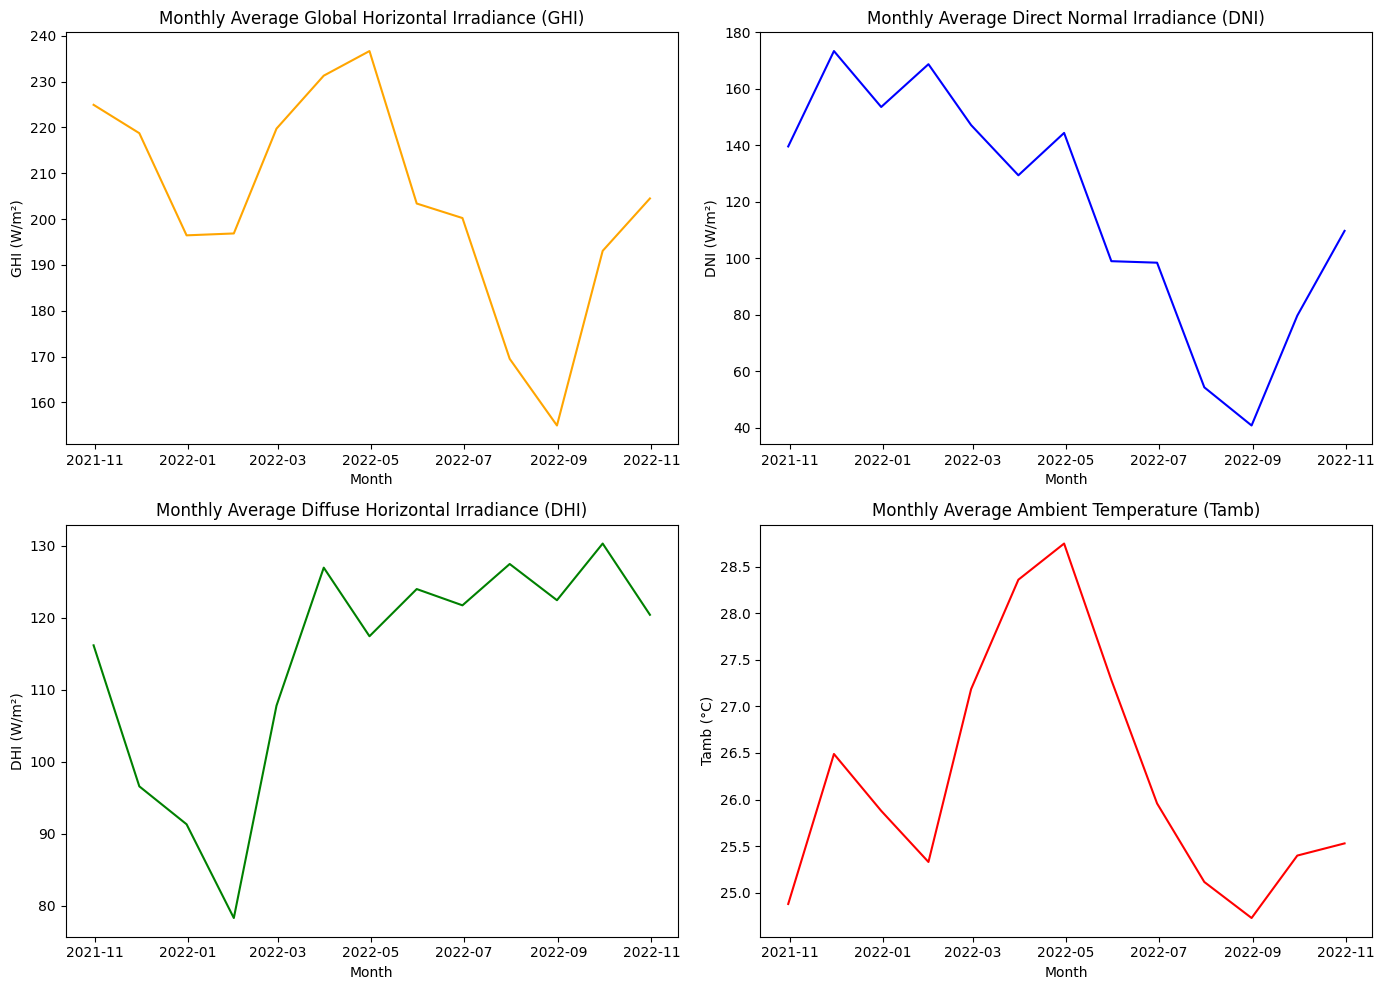

In [9]:
# Resample data to monthly means
monthly_data = data.resample('ME').mean()
plt.figure(figsize=(14, 10))

# Plot GHI
plt.subplot(2, 2, 1)
plt.plot(monthly_data.index, monthly_data['GHI'], color='orange')
plt.title('Monthly Average Global Horizontal Irradiance (GHI)')
plt.xlabel('Month')
plt.ylabel('GHI (W/m²)')

# Plot DNI
plt.subplot(2, 2, 2)
plt.plot(monthly_data.index, monthly_data['DNI'], color='blue')
plt.title('Monthly Average Direct Normal Irradiance (DNI)')
plt.xlabel('Month')
plt.ylabel('DNI (W/m²)')

# Plot DHI 
plt.subplot(2, 2, 3)
plt.plot(monthly_data.index, monthly_data['DHI'], color='green')
plt.title('Monthly Average Diffuse Horizontal Irradiance (DHI)')
plt.xlabel('Month')
plt.ylabel('DHI (W/m²)')

# Plot Tamb
plt.subplot(2, 2, 4)
plt.plot(monthly_data.index, monthly_data['Tamb'], color='red')
plt.title('Monthly Average Ambient Temperature (Tamb)')
plt.xlabel('Month')
plt.ylabel('Tamb (°C)')

plt.tight_layout()
plt.show()

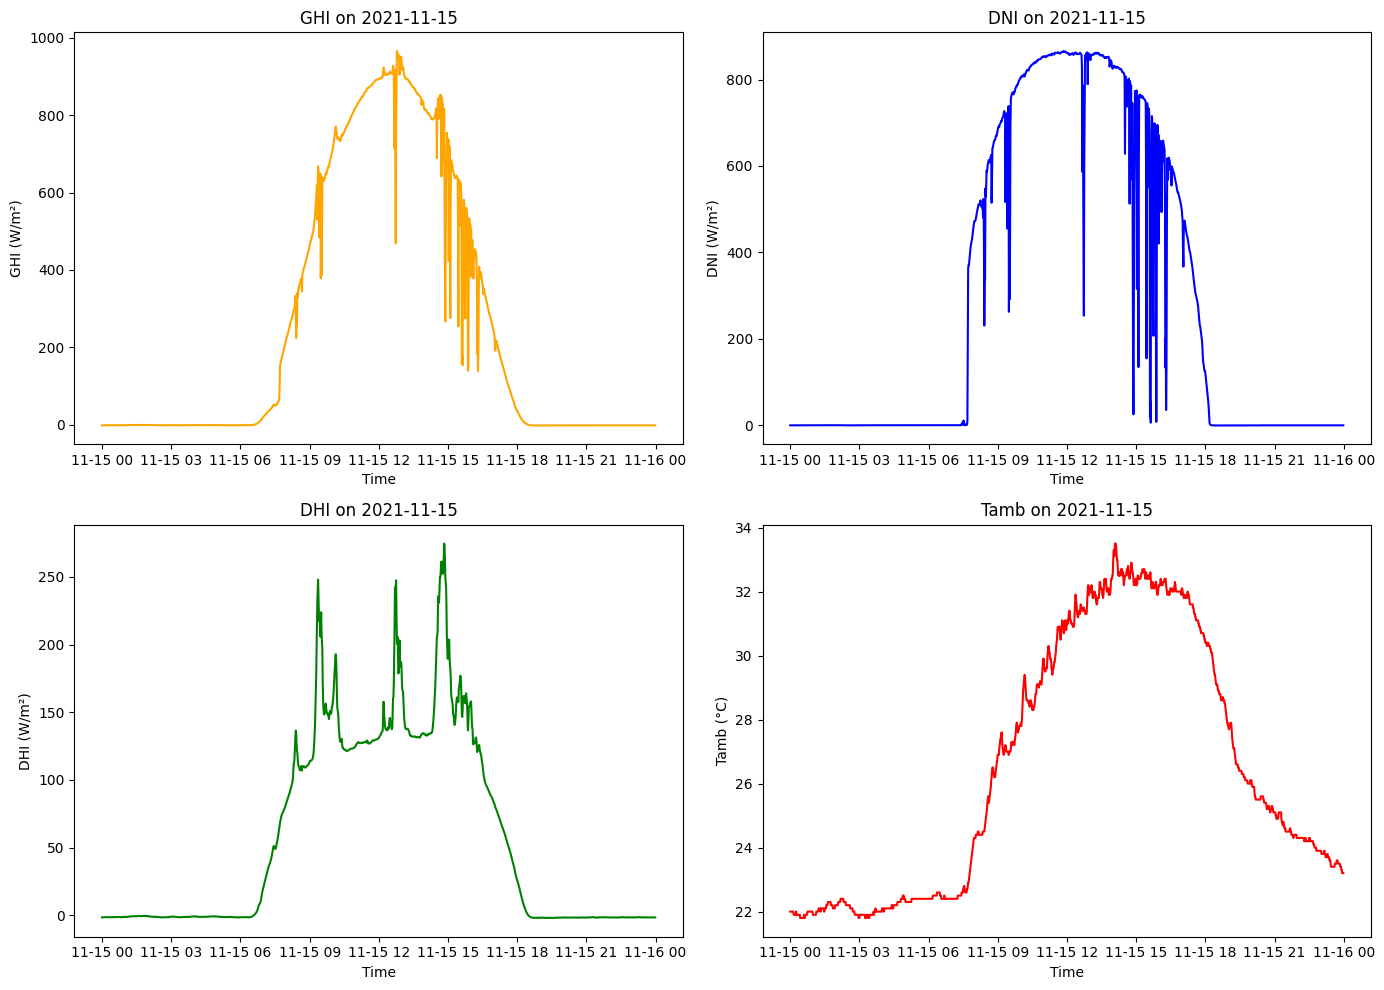

In [10]:
# Example: Zoom in on a specific day or range of days
specific_day = '2021-11-15'
data_specific_day = data.loc[specific_day]

plt.figure(figsize=(14, 10))

# Plot GHI
plt.subplot(2, 2, 1)
plt.plot(data_specific_day.index, data_specific_day['GHI'], color='orange')
plt.title(f'GHI on {specific_day}')
plt.xlabel('Time')
plt.ylabel('GHI (W/m²)')

# Plot DNI
plt.subplot(2, 2, 2)
plt.plot(data_specific_day.index, data_specific_day['DNI'], color='blue')
plt.title(f'DNI on {specific_day}')
plt.xlabel('Time')
plt.ylabel('DNI (W/m²)')

# Plot DHI
plt.subplot(2, 2, 3)
plt.plot(data_specific_day.index, data_specific_day['DHI'], color='green')
plt.title(f'DHI on {specific_day}')
plt.xlabel('Time')
plt.ylabel('DHI (W/m²)')

# Plot Tamb
plt.subplot(2, 2, 4)
plt.plot(data_specific_day.index, data_specific_day['Tamb'], color='red')
plt.title(f'Tamb on {specific_day}')
plt.xlabel('Time')
plt.ylabel('Tamb (°C)')

plt.tight_layout()
plt.show()

 Evaluate the impact of cleaning (using the 'Cleaning' column) on the sensor readings (ModA, ModB) over time.

C:\Users\BisreG\AppData\Local\Temp\ipykernel_15404\2475344695.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\BisreG\Desktop\kifiya_project\KifiyaVenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


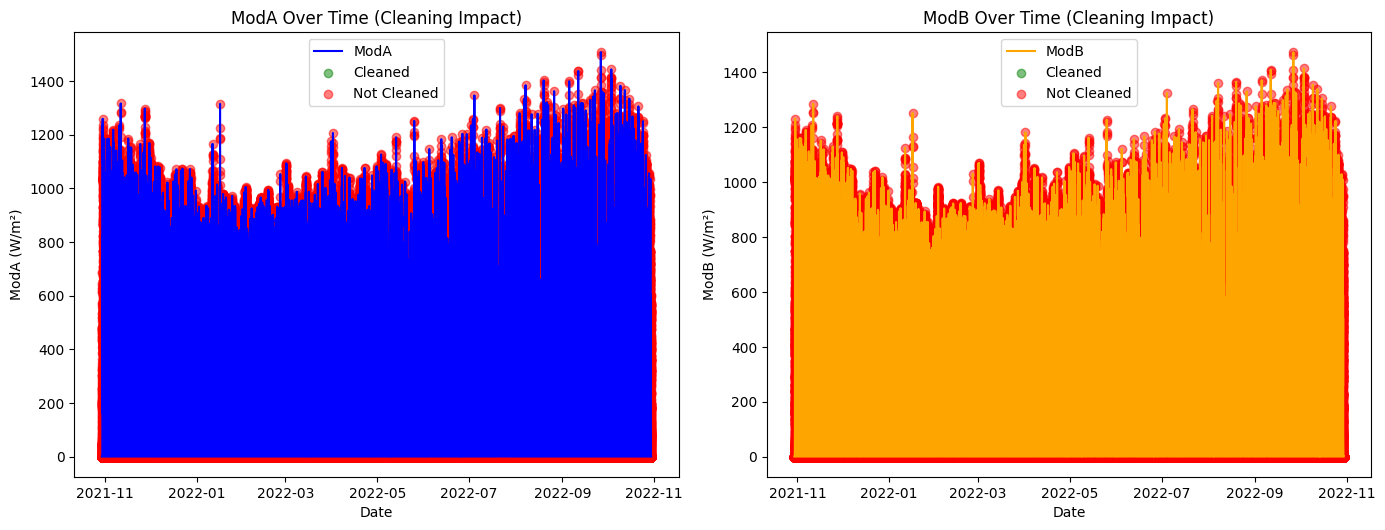

In [11]:
plt.figure(figsize=(14, 10))

# Plot ModA with respect to Cleaning
plt.subplot(2, 2, 1)
plt.plot(data.index, data['ModA'], color='blue', label='ModA')
plt.scatter(data.index[data['Cleaning'] == 1], data['ModA'][data['Cleaning'] == 1], color='green', label='Cleaned', alpha=0.5)
plt.scatter(data.index[data['Cleaning'] == 0], data['ModA'][data['Cleaning'] == 0], color='red', label='Not Cleaned', alpha=0.5)
plt.title('ModA Over Time (Cleaning Impact)')
plt.xlabel('Date')
plt.ylabel('ModA (W/m²)')
plt.legend()

# Plot ModB with respect to Cleaning
plt.subplot(2, 2, 2)
plt.plot(data.index, data['ModB'], color='orange', label='ModB')
plt.scatter(data.index[data['Cleaning'] == 1], data['ModB'][data['Cleaning'] == 1], color='green', label='Cleaned', alpha=0.5)
plt.scatter(data.index[data['Cleaning'] == 0], data['ModB'][data['Cleaning'] == 0], color='red', label='Not Cleaned', alpha=0.5)
plt.title('ModB Over Time (Cleaning Impact)')
plt.xlabel('Date')
plt.ylabel('ModB (W/m²)')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
# Calculate statistics before and after cleaning
cleaned_stats = data[data['Cleaning'] == 1][['ModA', 'ModB']].describe()
not_cleaned_stats = data[data['Cleaning'] == 0][['ModA', 'ModB']].describe()

print("Cleaned Data Statistics:")
print(cleaned_stats)

print("\nNot Cleaned Data Statistics:")
print(not_cleaned_stats)


Cleaned Data Statistics:
             ModA        ModB
count  508.000000  508.000000
mean   273.309252  277.231102
std    164.758517  163.548855
min      3.400000    3.500000
25%    153.725000  166.075000
50%    240.300000  247.550000
75%    364.800000  359.950000
max    906.000000  892.000000

Not Cleaned Data Statistics:
                ModA           ModB
count  525092.000000  525092.000000
mean      206.578599     198.038150
std       300.991724     288.973612
min         0.000000       0.000000
25%         0.000000       0.000000
50%         3.500000       3.300000
75%       359.500000     345.300000
max      1507.000000    1473.000000


Correlation Analysis: Use heatmaps or pair plots to visualize the correlations between solar radiation components (GHI, DNI, DHI) and temperature measures (TModA, TModB). Investigate the relationship between wind conditions (WS, WSgust, WD) and solar irradiance using scatter matrices.

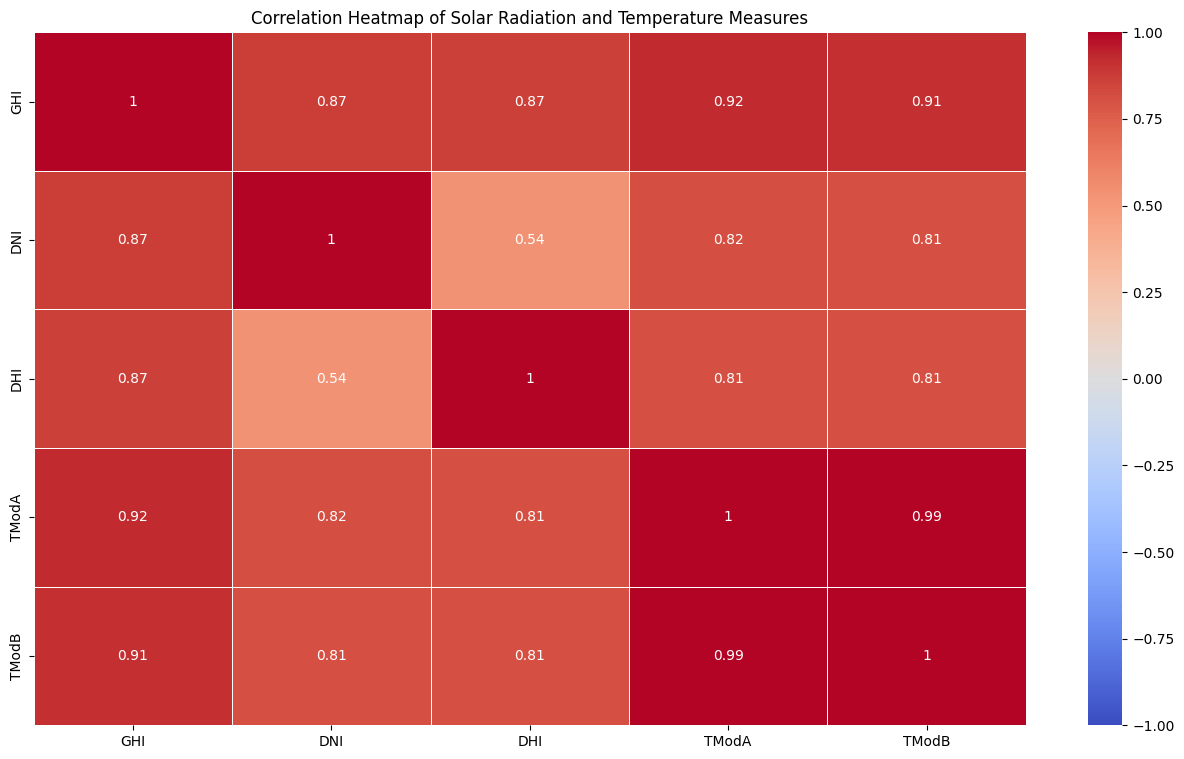

In [13]:
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = data[corr_columns].corr()

# Plot heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=0.5)
plt.title('Correlation Heatmap of Solar Radiation and Temperature Measures')
plt.show()

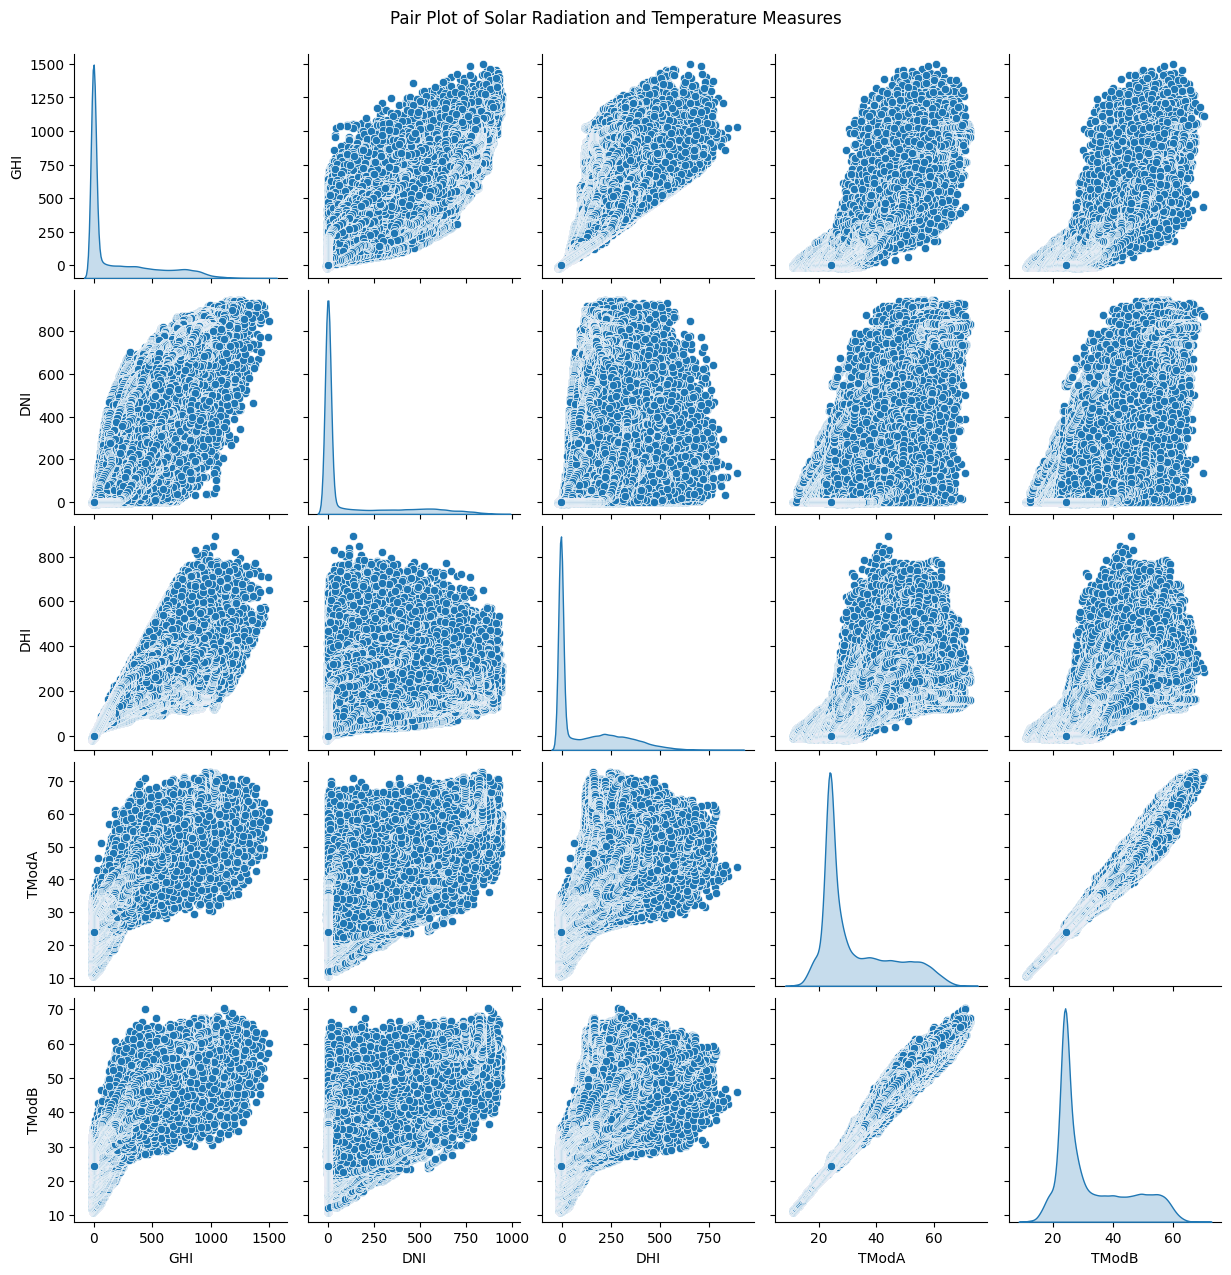

In [14]:
# Create a pair plot for selected variables
sns.pairplot(data[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']], diag_kind='kde')
plt.suptitle('Pair Plot of Solar Radiation and Temperature Measures', y=1.02)
plt.show()

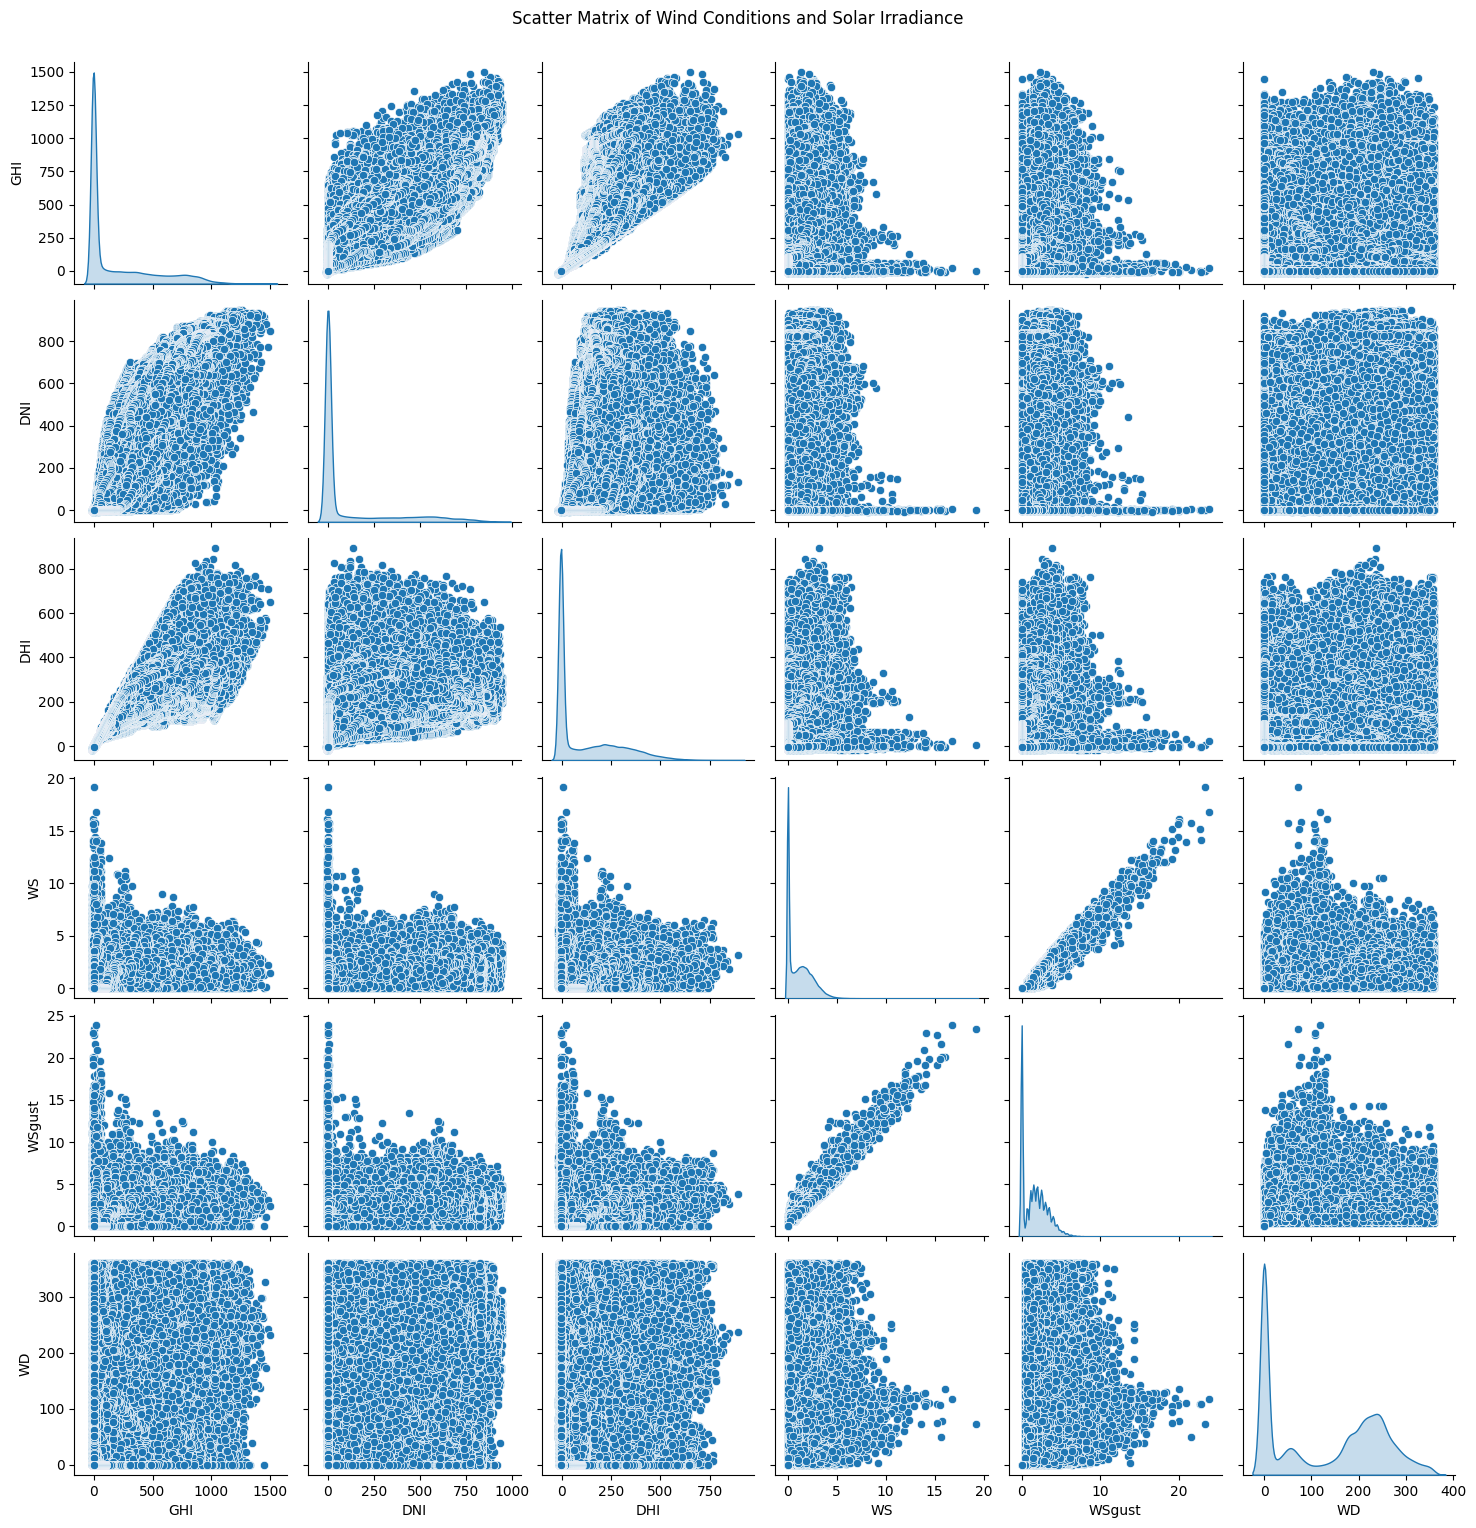

In [15]:
# Create a scatter matrix for wind conditions and solar irradiance
sns.pairplot(data[['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD']], diag_kind='kde')
plt.suptitle('Scatter Matrix of Wind Conditions and Solar Irradiance', y=1.02)
plt.show()

Wind Analysis: Use Polar plots Identify trends and significant wind events by showing the distribution of wind speed and direction, along with how variable the wind direction tends to be.

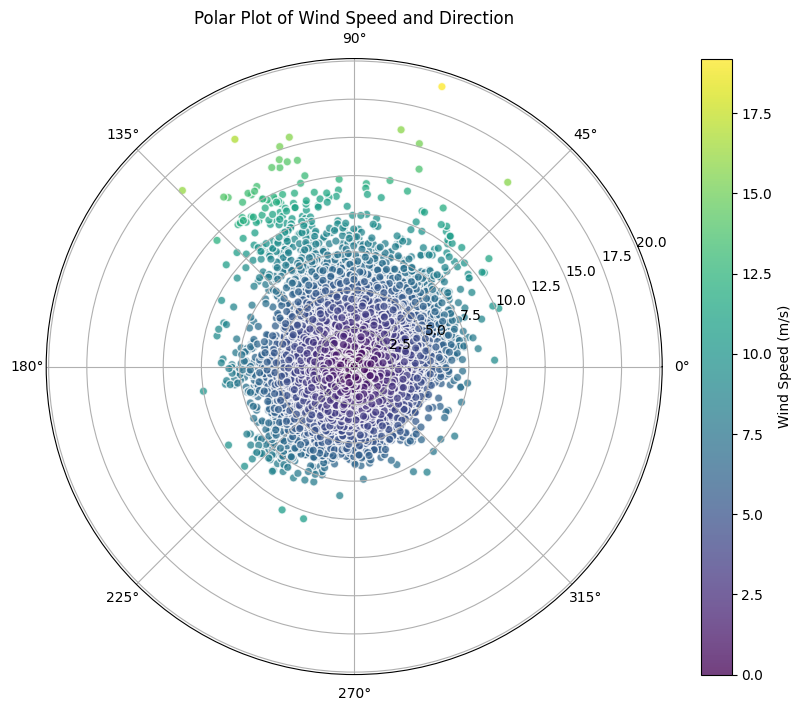

In [16]:
data['WD_rad'] = np.deg2rad(data['WD'])

# Prepare data for plotting
wind_speeds = data['WS'].dropna()
wind_directions = data['WD_rad'].dropna()

# Create polar plot
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='polar')

# Scatter plot of wind direction and speed
sc = ax.scatter(wind_directions, wind_speeds, c=wind_speeds, cmap='viridis', alpha=0.75, edgecolors='w')
plt.colorbar(sc, label='Wind Speed (m/s)')
ax.set_title('Polar Plot of Wind Speed and Direction')
plt.show()

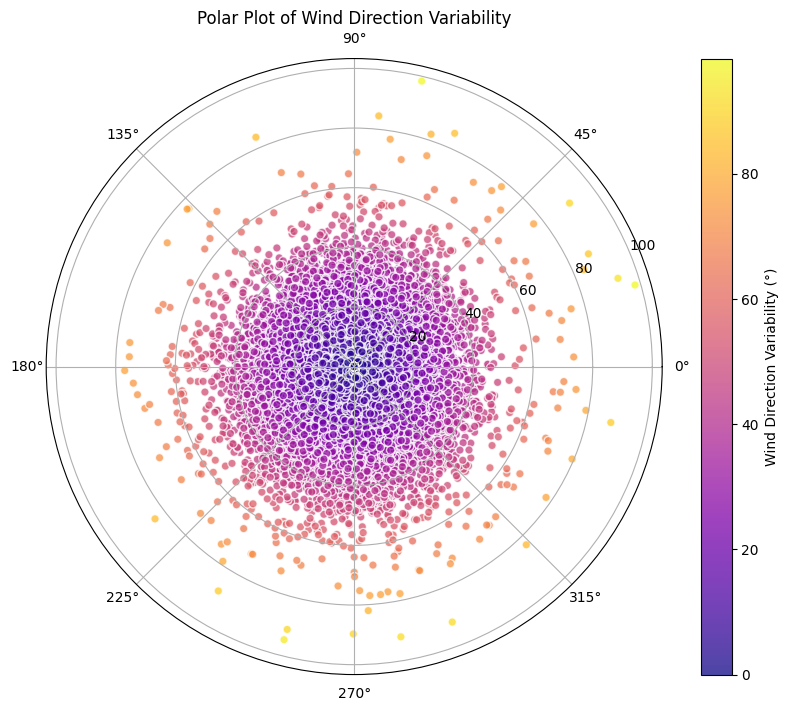

In [17]:
# Prepare data for variability plotting
wind_direction_std = data['WDstdev'].dropna()

# Create polar plot
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='polar')

# Scatter plot of wind direction and variability
sc = ax.scatter(wind_directions, wind_direction_std, c=wind_direction_std, cmap='plasma', alpha=0.75, edgecolors='w')
plt.colorbar(sc, label='Wind Direction Variability (°)')
ax.set_title('Polar Plot of Wind Direction Variability')
plt.show()

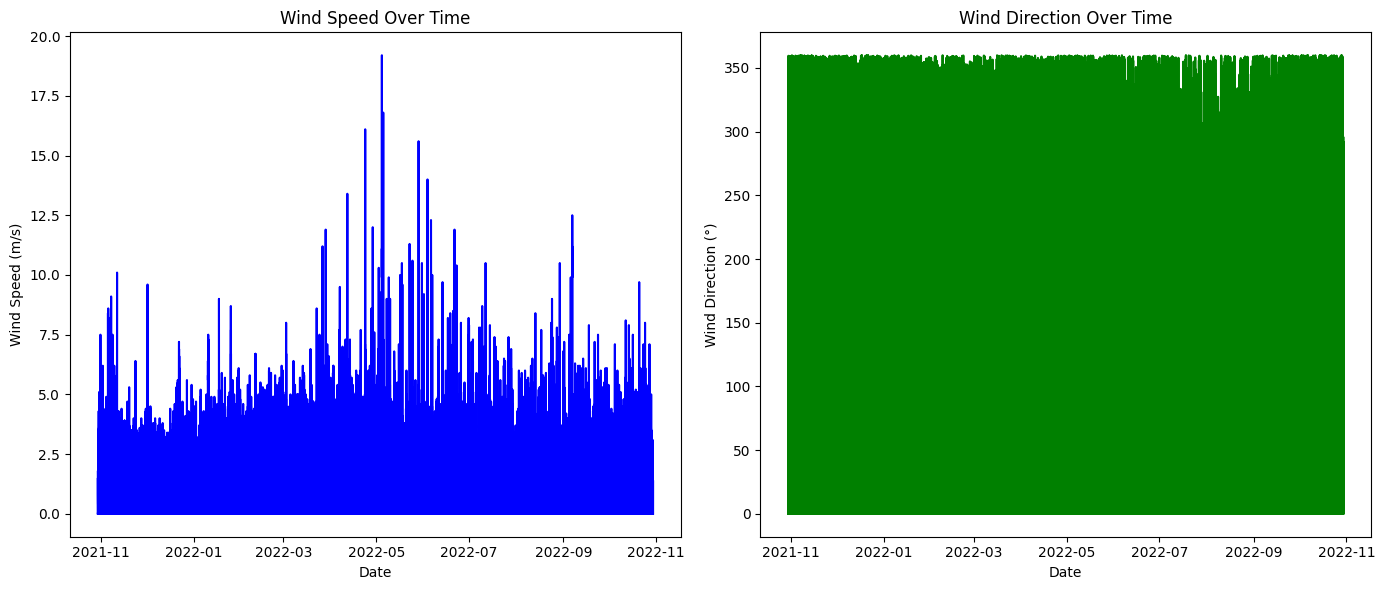

In [18]:
# Create time-series plots
plt.figure(figsize=(14, 6))

# Plot wind speed over time
plt.subplot(1, 2, 1)
plt.plot(data.index, data['WS'], label='Wind Speed (m/s)', color='blue')
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')

# Plot wind direction over time
plt.subplot(1, 2, 2)
plt.plot(data.index, data['WD'], label='Wind Direction (°)', color='green')
plt.title('Wind Direction Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Direction (°)')

plt.tight_layout()
plt.show()


Temperature Analysis: Examine how relative humidity (RH) might influence temperature readings and solar radiation.

In [19]:
# Calculate correlations to quantify the strength of relationships.
corr_rh_temp = data[['RH', 'Tamb']].corr().loc['RH', 'Tamb']
corr_rh_ghi = data[['RH', 'GHI']].corr().loc['RH', 'GHI']
corr_rh_dni = data[['RH', 'DNI']].corr().loc['RH', 'DNI']
corr_rh_dhi = data[['RH', 'DHI']].corr().loc['RH', 'DHI']

print(f"Correlation between RH and Temperature: {corr_rh_temp:.2f}")
print(f"Correlation between RH and GHI: {corr_rh_ghi:.2f}")
print(f"Correlation between RH and DNI: {corr_rh_dni:.2f}")
print(f"Correlation between RH and DHI: {corr_rh_dhi:.2f}")

Correlation between RH and Temperature: -0.79
Correlation between RH and GHI: -0.55
Correlation between RH and DNI: -0.55
Correlation between RH and DHI: -0.43


Histograms: Create histograms for variables like GHI, DNI, DHI, WS, and temperatures to visualize the frequency distribution of these variables.

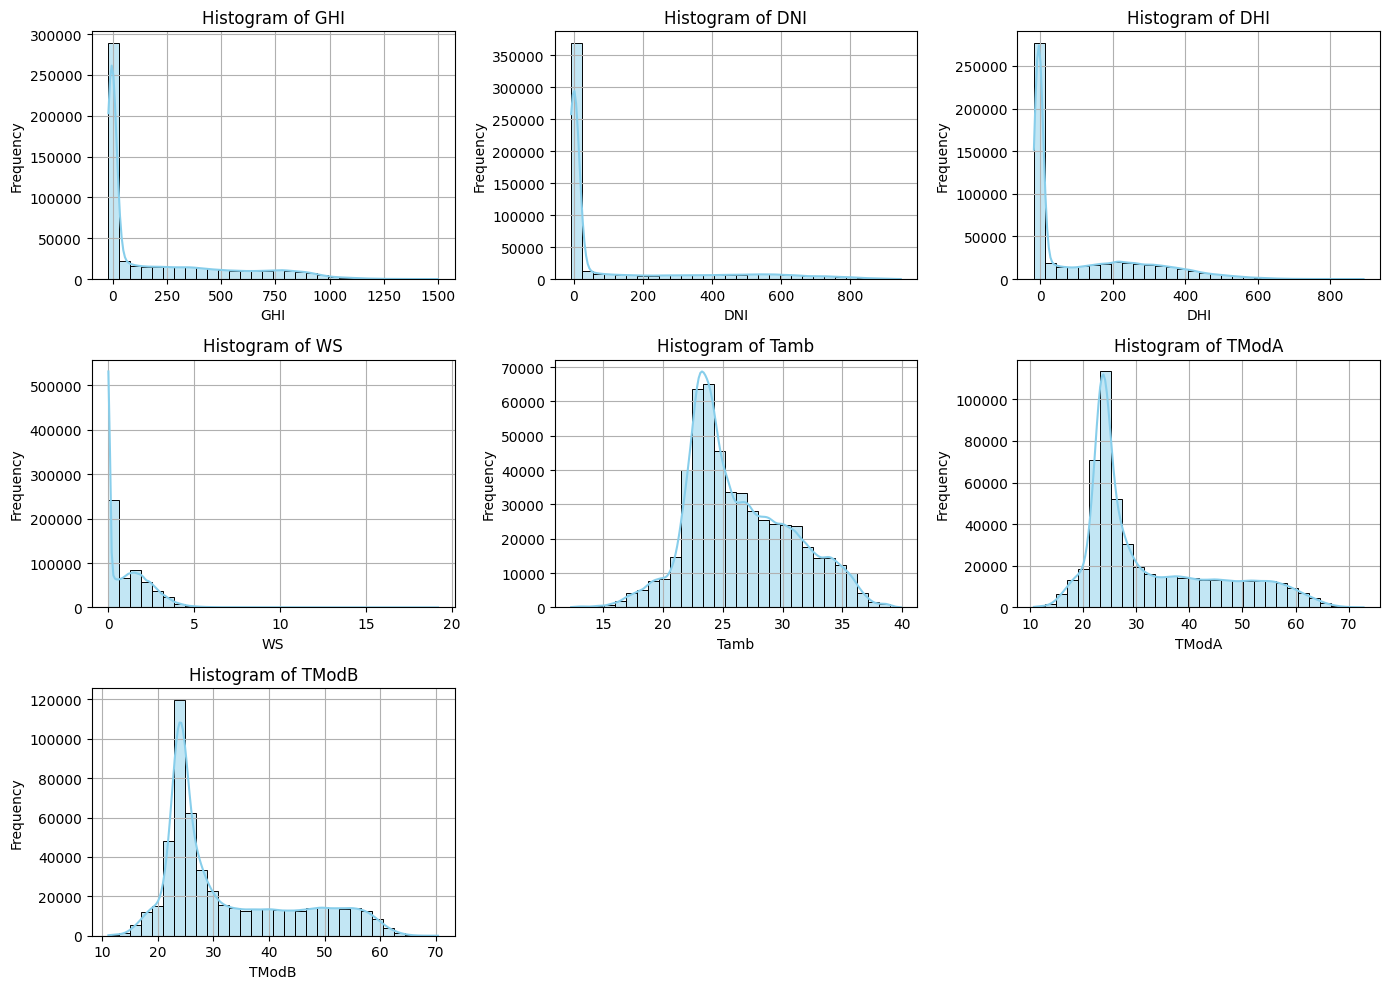

In [20]:
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'TModA', 'TModB']

# Create histograms for each variable
plt.figure(figsize=(14, 10))
for i, var in enumerate(variables):
    plt.subplot(3, 3, i + 1)  # Create a subplot for each variable
    sns.histplot(data[var], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

Z-Score Analysis: Calculate Z-scores to flag data points that are significantly different from the mean

In [21]:
columns_to_check_for_outliners = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'TModA', 'TModB']

z_scores = data[columns_to_check_for_outliners].apply(zscore)

threshold = 2
outliers = (z_scores.abs() > threshold)
data['Outlier'] = outliers.any(axis=1)

outlier_data = data[data['Outlier']]
print(outlier_data, outlier_data.shape)


                       GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
Timestamp                                                                 
2021-10-30 09:42:00  529.8  128.6  440.1  567.0  553.5  23.8  93.1  0.0   
2021-10-30 09:43:00  534.9  119.7  450.9  570.5  556.9  23.8  93.2  0.0   
2021-10-30 09:44:00  594.6  189.5  462.7  638.2  622.9  23.9  93.7  0.0   
2021-10-30 09:45:00  587.8  157.9  476.9  627.8  612.9  24.0  93.3  0.0   
2021-10-30 09:46:00  578.6  137.7  481.8  614.8  600.3  24.0  91.3  0.0   
...                    ...    ...    ...    ...    ...   ...   ...  ...   
2022-10-29 12:31:00  618.7  190.1  436.3  651.5  634.9  30.0  77.9  0.7   
2022-10-29 12:32:00  632.2  201.6  439.3  666.8  649.8  30.0  77.4  0.4   
2022-10-29 12:33:00  677.3  244.2  443.8  715.0  696.7  30.0  77.2  0.1   
2022-10-29 12:34:00  681.9  249.6  443.0  719.8  701.2  30.1  76.9  0.2   
2022-10-29 12:35:00  637.7  211.2  434.9  671.9  654.3  30.1  76.9  0.0   

                     WSg

#Bubble charts to explore complex relationships between variables, such as GHI vs. Tamb vs. WS, with bubble size representing an additional variable like RH or BP (Barometric Pressure)

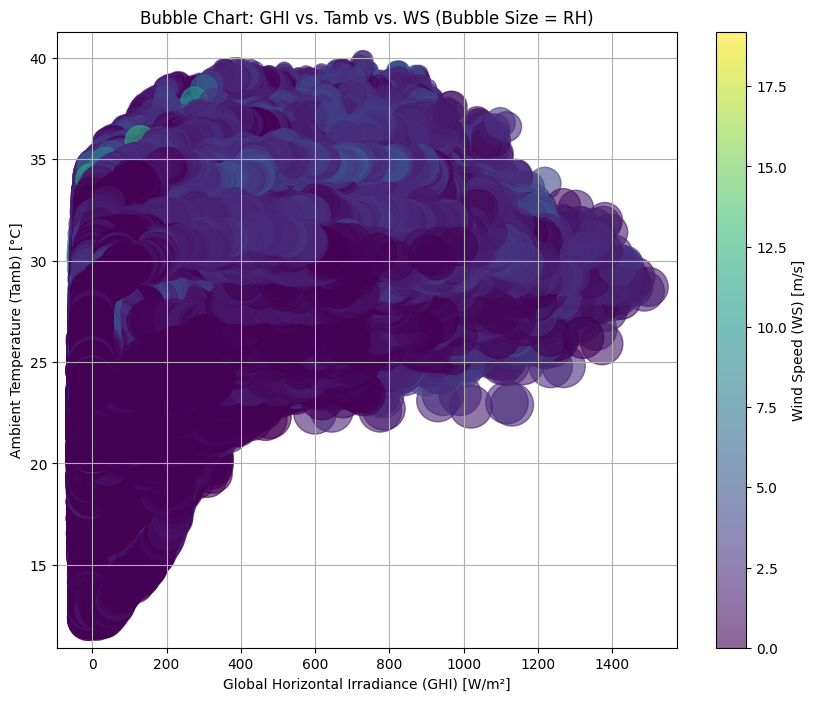

In [22]:
plt.figure(figsize=(10, 8))

# Scatter plot with bubble size representing RH
plt.scatter(data['GHI'], data['Tamb'], s=data['RH']*10, c=data['WS'], alpha=0.6, cmap='viridis')

# Adding labels and title
plt.title('Bubble Chart: GHI vs. Tamb vs. WS (Bubble Size = RH)')
plt.xlabel('Global Horizontal Irradiance (GHI) [W/m²]')
plt.ylabel('Ambient Temperature (Tamb) [°C]')

# Adding colorbar for WS
cbar = plt.colorbar()
cbar.set_label('Wind Speed (WS) [m/s]')

# Show the plot
plt.grid(True)
plt.show()

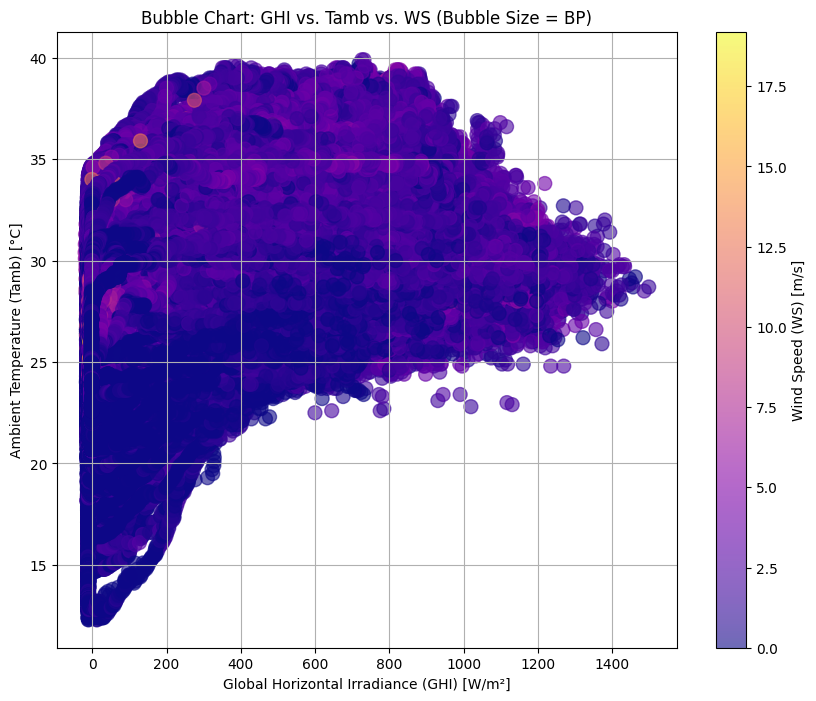

In [23]:
plt.figure(figsize=(10, 8))

plt.scatter(data['GHI'], data['Tamb'], s=data['BP']*0.1, c=data['WS'], alpha=0.6, cmap='plasma')

plt.title('Bubble Chart: GHI vs. Tamb vs. WS (Bubble Size = BP)')
plt.xlabel('Global Horizontal Irradiance (GHI) [W/m²]')
plt.ylabel('Ambient Temperature (Tamb) [°C]')

cbar = plt.colorbar()
cbar.set_label('Wind Speed (WS) [m/s]')

plt.grid(True)
plt.show()

Data Cleaning: Based on the initial analysis, clean the dataset by handling anomalies and missing values, especially in columns like Comments which appear entirely null.

In [24]:
# Drop columns with all null values
data = data.dropna(axis=1, how='all')

# Fill missing values in specific columns with mean or median
data['GHI'].fillna(data['GHI'].mean())
data['DNI'].fillna(data['DNI'].mean())
data['DHI'].fillna(data['DHI'].mean())

# Drop rows with missing values in critical columns
data.dropna(subset=['Tamb', 'WS'], inplace=True)

In [25]:
z_scores = np.abs(zscore(data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'TModA', 'TModB']].dropna()))
threshold = 3
data = data[(z_scores < threshold).all(axis=1)]


In [26]:
# Replace negative values with NaN in columns that should be non-negative
data.loc[data['GHI'] < 0, 'GHI'] = np.nan
data.loc[data['DNI'] < 0, 'DNI'] = np.nan
data.loc[data['DHI'] < 0, 'DHI'] = np.nan
data.loc[data['WS'] < 0, 'WS'] = np.nan

# Refill missing values after correcting negatives
data['GHI'].fillna(data['GHI'].mean())
data['DNI'].fillna(data['DNI'].mean())
data['DHI'].fillna(data['DHI'].mean())
data['WS'].fillna(data['WS'].mean())


Timestamp
2021-10-30 00:01:00    0.0
2021-10-30 00:02:00    0.0
2021-10-30 00:03:00    0.0
2021-10-30 00:04:00    0.0
2021-10-30 00:05:00    0.0
                      ... 
2022-10-29 23:56:00    0.0
2022-10-29 23:57:00    0.0
2022-10-29 23:58:00    0.0
2022-10-29 23:59:00    0.0
2022-10-30 00:00:00    0.0
Name: WS, Length: 509934, dtype: float64

In [27]:
data.describe()

GHI            DNI            DHI           ModA  \
count  250478.000000  245882.000000  248502.000000  509934.000000   
mean      382.854269     216.994917     227.650159     190.342753   
std       287.588158     244.247822     144.127123     282.631329   
min         0.000000       0.000000       0.000000       0.000000   
25%       125.200000       1.000000     108.500000       0.000000   
50%       340.000000      94.800000     223.200000       1.300000   
75%       610.075000     431.300000     333.700000     328.200000   
max      1097.000000     772.300000     590.500000    1167.000000   

                ModB           Tamb             RH             WS  \
count  509934.000000  509934.000000  509934.000000  509934.000000   
mean      182.255720      26.223722      79.726234       1.094572   
std       270.724187       4.391146      20.571815       1.160540   
min         0.000000      13.200000       9.900000       0.000000   
25%         0.000000      23.100000      69.000000       0.000000   
50%         1.200000      25.100000      86.100000       0.800000   
75%       315.400000      29.200000      96.900000       1.900000   
max      1142.000000      39.500000     100.000000       4.800000   

              WSgust        WSstdev             WD        WDstdev  \
count  509934.000000  509934.000000  509934.000000  509934.000000   
mean        1.621823       0.353522     131.049145       6.979387   
std         1.514345       0.285417     114.345714       7.462846   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.400000       0.400000     156.500000       5.800000   
75%         2.600000       0.500000     232.800000      11.800000   
max        12.500000       3.400000     360.000000      98.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  509934.000000  509934.000000  509934.000000  509934.000000   
mean      999.873084       0.000996       0.004220      31.983008   
std         2.107117       0.031547       0.040726      12.036127   
min       993.000000       0.000000       0.000000      11.100000   
25%       999.000000       0.000000       0.000000      23.400000   
50%      1000.000000       0.000000       0.000000      26.300000   
75%      1001.000000       0.000000       0.000000      39.600000   
max      1006.000000       1.000000       2.000000      69.800000   

               TModB         WD_rad  
count  509934.000000  509934.000000  
mean       32.108845       2.287239  
std        11.671344       1.995709  
min        11.500000       0.000000  
25%        23.700000       0.000000  
50%        26.600000       2.731440  
75%        40.000000       4.063126  
max        67.400000       6.283185

In [28]:
data.to_csv('../data/cleaned_sierraleone-bumbuna_data.csv', index=False)